<a href="https://colab.research.google.com/github/FaithGakori/Financial-Inclusion/blob/main/Financial_Inclusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding the Context

Financial inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 14% of adults) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and make payments while also helping businesses build up their credit-worthiness and improve their access to loans, insurance, and related services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

## Objectives

*   Perform data cleaning
*   Create visualizations, to help predict which are likely to have/use bank accounts.



## Data Understanding

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib
%pylab inline

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [ ]:
#import the dataset
df = pd.read_csv('Train.csv')

# first 10 records
df.head(10)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7,26,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7,32,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,uniqueid_8,No,Rural,Yes,1,42,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3,54,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,uniqueid_10,No,Urban,Yes,3,76,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


The Variable defination dataset helps us understand the meaning of each column.

In [ ]:
# var definations
var = pd.read_csv('VariableDefinitions.csv')
var.head(13)

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [ ]:
#brief description of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [ ]:
# shape
df.shape

(23524, 13)

Contains 23,524 rows and 13 columns.

In [ ]:
#duplicates
df.duplicated().sum()

0

In [ ]:
#missing values
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

No missing values.

In [ ]:
#datatypes
df.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

Categorical columns are , country, bank account, location type. cellphone access, gender, marital status, educaton level, job type, relationship with head.

In [ ]:
df.head(2)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent


In [ ]:
#statistical analysis
df.describe(include='all')

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524.000000,23524,23524,23524,23524,23524.000000,23524.000000,23524,23524,23524,23524,23524
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,6,10
top,Rwanda,NaN,uniqueid_474,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20212,14343,17454,NaN,NaN,13877,12831,10749,12791,6437
mean,NaN,2016.975939,NaN,NaN,NaN,NaN,3.797483,38.805220,NaN,NaN,NaN,NaN,NaN
std,NaN,0.847371,NaN,NaN,NaN,NaN,2.227613,16.520569,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,1.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


## Data Cleaning


changing the data types into correct ones


In [ ]:
#renaming the columns
df.rename(columns={'age_of_respondent':'respondent_age', 'gender_of_respondent':'gender'}, inplace=True)
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'respondent_age', 'gender',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

In [ ]:

for column in df[df.columns.difference(['household_size', 'respondent_age'])].columns:
  df[column] = df[column].astype('category')

In [ ]:
  #previewing the columns
df.dtypes

country                   category
year                      category
uniqueid                  category
bank_account              category
location_type             category
cellphone_access          category
household_size               int64
respondent_age               int64
gender                    category
relationship_with_head    category
marital_status            category
education_level           category
job_type                  category
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


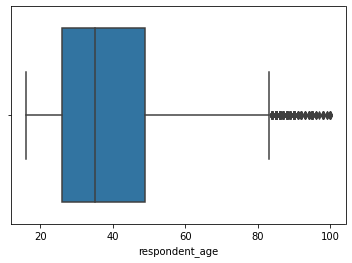

In [ ]:
#checking for outliers
sns.boxplot(df['respondent_age'])

In [ ]:
df['respondent_age'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

30    1056
35     836
25     792
28     748
32     715
      ... 
91       5
93       4
96       3
99       2
97       1
Name: respondent_age, Length: 85, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


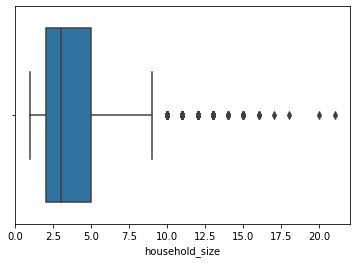

In [ ]:
sns.boxplot(df['household_size'])

In [ ]:
df['household_size'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

2     5229
3     3920
4     3474
1     3057
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
15      11
14      10
16       4
18       1
17       1
20       1
21       1
Name: household_size, dtype: int64

## Data Visualization



## Univariate Analysis


In this section, I will investigate the value counts of each feature.

1. Which country has the most repondents

(array([6068.,    0.,    0., 8735.,    0.,    0., 6620.,    0.,    0.,
        2101.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

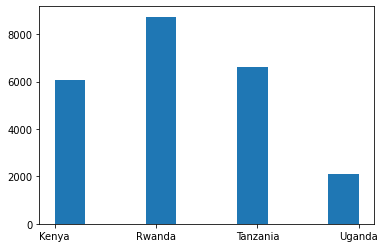

In [ ]:
plt.hist(df['country'])

Rwanda had the most respondents folowed by Tanzania, Kenya and Uganda respectively.

2. Which year had the highest number of respondents?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


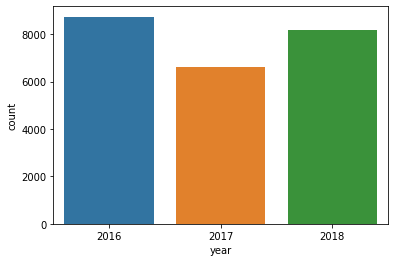

In [ ]:
sns.countplot(df['year'])

In 2017, the respondents were less compared to 2016 which had the highest followed by 2018.

3. Are the number of people having bank accounts higher?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


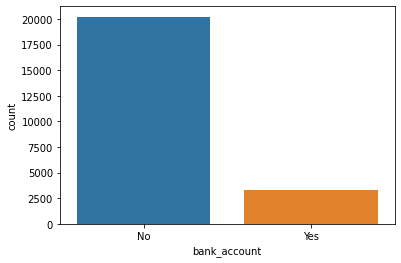

In [ ]:
sns.countplot(df['bank_account'])

Most people do not own bank accounts

4. Which location has the highest number of population


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


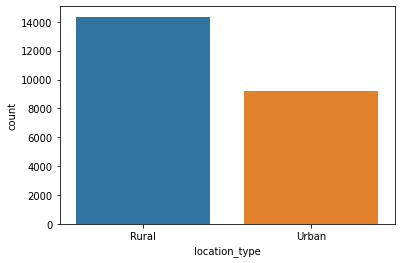

In [ ]:
sns.countplot(df['location_type'])

Most people live in rural areas


5. How many people have cellphone access


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


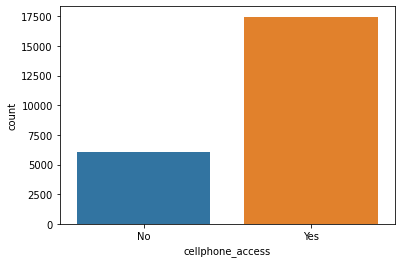

In [ ]:
sns.countplot(df['cellphone_access'])

More people have access to cellphones

6.  Household_size

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


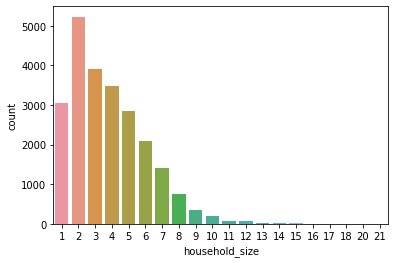

In [ ]:
sns.countplot(df['household_size'])

Most living 2 people

7. Gender

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


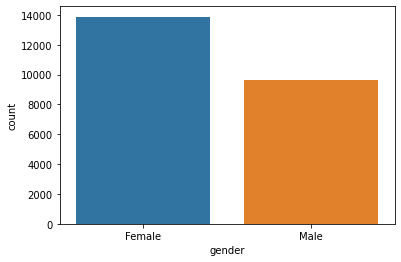

In [ ]:
sns.countplot(df['gender'])

females are more than males

8. Marital status

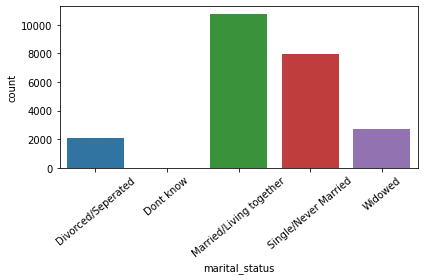

In [ ]:
ax = sns.countplot(x='marital_status', data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
plt.tight_layout()
plt.show()

In [ ]:
df['marital_status'].value_counts(ascending=False)

Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: marital_status, dtype: int64

Most respondents are married.

9. education level

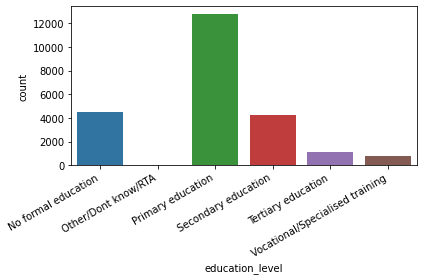

In [ ]:
ax = sns.countplot(x='education_level', data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df['education_level'].value_counts(ascending=False)

Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: education_level, dtype: int64

Most respondents have upto primary education

10. Job type

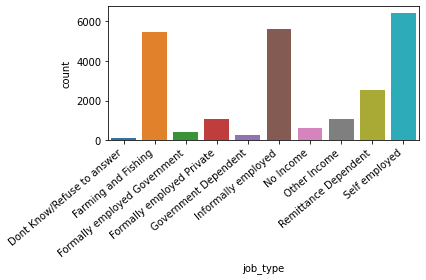

In [ ]:
ax = sns.countplot(x="job_type", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Most respondents are self employed.

## Bivariate Analysis

comparing bank account to each feature

1.   Which country has the highest number of bank accounts?
2.   Which survey year did people have more bank accounts?
3.   Which pple by location type are more likely to have   bank accounts?
4.    How does cellphone access affect bank ownership?
5.    How does household size affect bank ownership?
6.   Which gender is more likely to hve bank account
7.   How does marital status determine bank ownership?
8.   Bank ownership by education level
9.   Bank ownership by job type


categorical data can be visualized by;


*   Boxplots - categorical & continous
*   Two waytable - categorical & categorical
*   stacked column charts - nominal categorical & ordinal categorical
*    scatter plots - nominal categorical data
*    hex plots - nominal categorical data
*    bivariate line chart - ordinal
*    violin plots




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


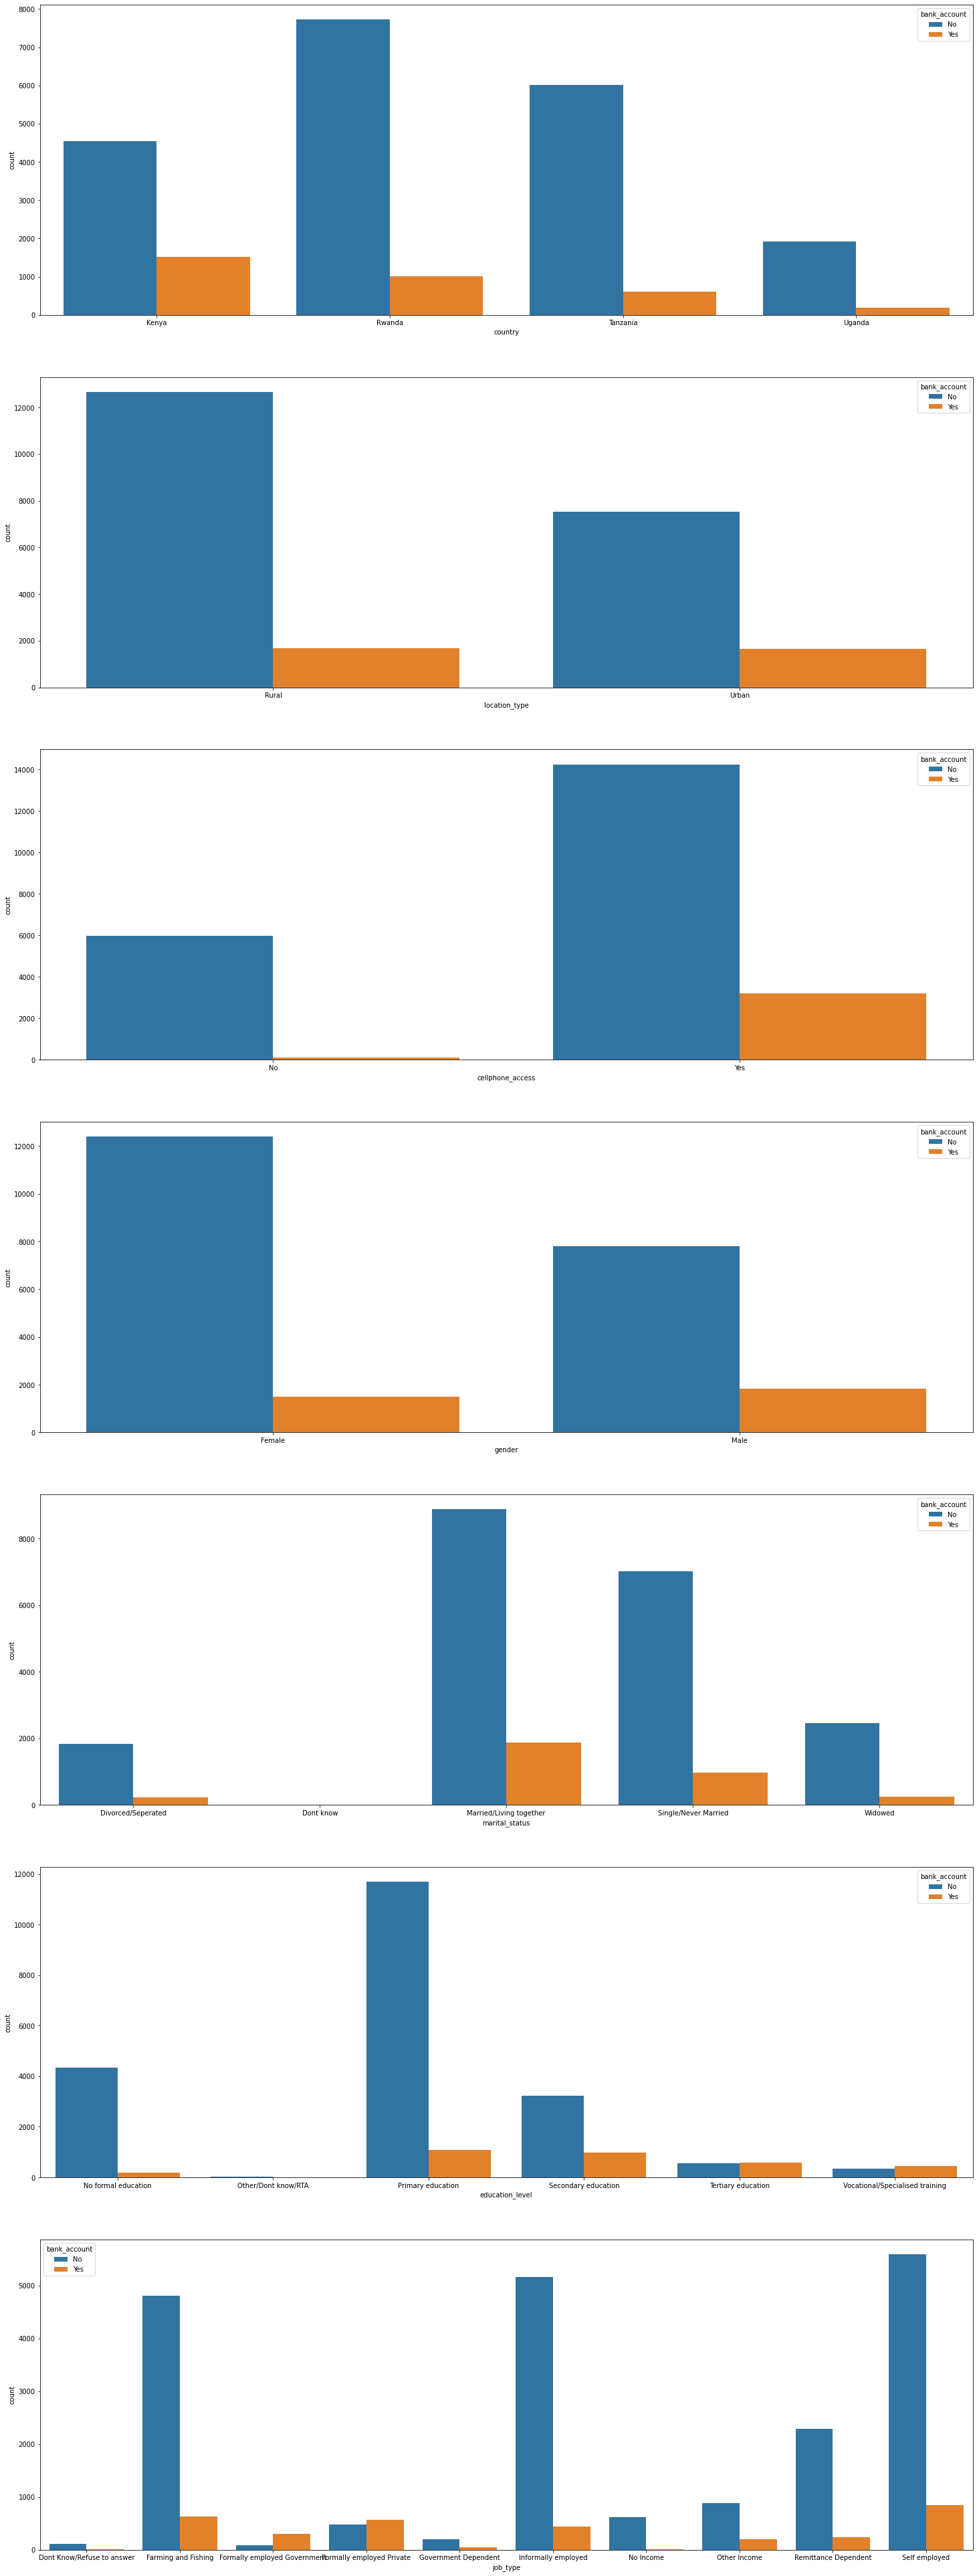

In [ ]:
f, axes = plt.subplots(7, 1, figsize=[25,70])
sns.countplot('country', hue= 'bank_account', data = df, ax=axes[0])
sns.countplot('location_type', hue= 'bank_account', data = df, ax=axes[1])
sns.countplot('cellphone_access', hue= 'bank_account', data = df, ax=axes[2])
sns.countplot('gender', hue= 'bank_account', data = df, ax=axes[3])
sns.countplot('marital_status', hue= 'bank_account', data = df, ax=axes[4])
sns.countplot('education_level', hue= 'bank_account', data = df, ax=axes[5])
sns.countplot('job_type', hue= 'bank_account', data = df, ax=axes[6])

### Summary

1. Kenya has the highest number of respondents who own bank accounts.

2. Respondents who own bank accounts have access to cellphones.

3. More males have access to bank accounts compared to females.

4. Married respondents mainly own bank accounts.

5. Those with primary and secondary education have the highest count of respondents who own accounts.

6. Self employed respondents mainly own bank accounts.

In [ ]:
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'respondent_age', 'gender',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')